# 目標  
預測「巴哈姆特動畫瘋」之上架動畫的平均觀看數(是否受歡迎)

# 載入CSV

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/BaHaMut_9.csv')
df

,動畫名,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬),總觀看數(萬)
0,叫我對大哥 (TV版),2021,夏番,12,4.8,600,青木純,Fanworks、SPACE NEKO COMPANY,喜劇,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,1.8,21.7
1,汪汪與喵喵,2020,秋番,24,4.8,200,岸誠二,Team Till Dawn,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0.3,6.6
2,鬼滅之刃 刀匠村篇,2023,春番,11,4.8,18600,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,49.9,548.8
3,IDOLiSH7 - 偶像星願 - Third BEAT！,2021,夏番,30,4.8,1300,別所誠人,TROYCA,偶像,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,1.9,56.0
4,薄櫻鬼 新OVA,2021,秋番,3,4.8,300,ヤマサキオサム,Studio DEEN,奇幻,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,1.6,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,土下座跪求給看 年齡限制版,2020,秋番,13,4.5,1700,永居慎平,アドネロ,動作,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,8.0,103.4
434,女神宿舍的管理員。 年齡限制版,2021,夏番,10,4.7,2300,中重俊祐,Asread,校園,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,11.3,112.7
435,彼得・格里爾的賢者時間 年齡限制版,2020,夏番,12,4.2,1600,辰美,Wolfsbane,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,11.2,133.9
436,壽司大相撲,2021,春番,52,4.1,400,助川勇太,白組,喜劇,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0.4,23.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   動畫名       438 non-null    object 
 1   年份        438 non-null    int64  
 2   月份        438 non-null    object 
 3   集數        438 non-null    int64  
 4   星級        438 non-null    float64
 5   評分人數      438 non-null    int64  
 6   導演監督      436 non-null    object 
 7   製作廠商      438 non-null    object 
 8   作品分類1     438 non-null    object 
 9   作品分類2     434 non-null    object 
 10  作品分類3     316 non-null    object 
 11  作品分類4     142 non-null    object 
 12  作品分類5     44 non-null     object 
 13  作品分類6     5 non-null      object 
 14  原作載體      438 non-null    object 
 15  新續作       438 non-null    object 
 16  平均觀看數(萬)  438 non-null    float64
 17  總觀看數(萬)   438 non-null    float64
dtypes: float64(3), int64(3), object(12)
memory usage: 61.7+ KB


In [ ]:
# 加入人氣度
p = df['平均觀看數(萬)'].to_list()
q = []
# for number in p:
#     if number >= 40:
#         q.append(3)
#     elif 40 > number >= 20:
#         q.append(2)
#     elif 20 > number >= 10:
#         q.append(1)
#     elif number < 10:
#         q.append(0)

for number in p:
  if number >= 14:
    q.append(1)
  else:
    q.append(0)

df['人氣度'] = q
df1 = df[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作', '人氣度']]
df1

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,喜劇,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0
1,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0
2,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,1
3,偶像,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,0
4,奇幻,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,0
...,...,...,...,...,...,...,...,...,...
433,動作,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,0
434,校園,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,0
435,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,0
436,喜劇,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0


In [ ]:
No_DR_TagList = []
for i in range(438):
    tagStr = []
    tags = df1.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    No_DR_TagList.append(tagStr)
No_DR_TagList

['喜劇 悠閒 泡麵番 闔家觀賞 漫畫改編 新作',
 '喜劇 溫馨 泡麵番 闔家觀賞 漫畫改編 新作',
 '動作 冒險 奇幻 血腥暴力 漫畫改編 續作',
 '偶像 音樂 遊戲改編 續作',
 '奇幻 戀愛 歷史 遊戲改編 續作',
 '科幻 機甲 喜劇 遊戲改編 新作',
 '科幻 機甲 校園 戰爭 原創作品 續作',
 '運動 競技 原創作品 續作',
 '動作 科幻 喜劇 職場 原創作品 新作',
 '冒險 奇幻 小說改編 新作',
 '動作 冒險 科幻 原創作品 新作',
 '冒險 喜劇 闔家觀賞 原創作品 新作',
 '超能力 科幻 競技 原創作品 新作',
 '動作 冒險 奇幻 小說改編 續作',
 '親情 懸疑 黑暗 漫畫改編 新作',
 '動作 冒險 異世界 血腥暴力 漫畫改編 續作',
 '親情 偶像 懸疑 漫畫改編 新作',
 '冒險 奇幻 異世界 料理 小說改編 新作',
 '校園 戀愛 青春 漫畫改編 新作',
 '冒險 奇幻 小說改編 新作',
 '冒險 奇幻 小說改編 新作',
 '機甲 歷史 戰爭 遊戲改編 續作',
 '校園 偶像 音樂 原創作品 新作',
 '動作 冒險 奇幻 小說改編 續作',
 '冒險 奇幻 魔法 戀愛 溫馨 漫畫改編 續作',
 '校園 青春 勵志 運動 競技 漫畫改編 續作',
 '奇幻 喜劇 靈異神怪 漫畫改編 續作',
 '冒險 奇幻 小說改編 續作',
 '冒險 奇幻 感人 漫畫改編 續作',
 '動作 科幻 黑暗 遊戲改編 新作',
 '喜劇 青春 悠閒 漫畫改編 新作',
 '喜劇 戀愛 漫畫改編 新作',
 '喜劇 泡麵番 漫畫改編 新作',
 '動作 運動 競技 漫畫改編 新作',
 '校園 戀愛 青春 漫畫改編 新作',
 '冒險 奇幻 小說改編 新作',
 '校園 喜劇 戀愛 靈異神怪 漫畫改編 新作',
 '動作 超能力 勵志 溫馨 感人 靈異神怪 漫畫改編 續作',
 '科幻 機甲 戀愛 遊戲改編 續作',
 '奇幻 靈異神怪 漫畫改編 續作',
 '冒險 奇幻 戰爭 血腥暴力 黑暗 18禁 漫畫改編 續作',
 '冒險 奇幻 小說改編 新作',
 '動作 喜劇 溫馨 原創作品 新作',
 '冒險 奇幻 原創作品 新作',
 '動作 血腥暴力 漫畫改編 新作',
 '動作 奇幻 異世

# 視覺化

In [ ]:
# 設定matplotlib中文字型
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid", {"font.sans-serif": ['Taipei Sans TC Beta']})

--2023-12-15 07:55:15--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.143.102, 74.125.143.113, 74.125.143.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.143.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fmg75th0h6ja2bfv7vvqdjqn6vl802ho/1702626900000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=9aaed336-0bb2-4354-90c4-48995d5e1020 [following]
--2023-12-15 07:55:16--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fmg75th0h6ja2bfv7vvqdjqn6vl802ho/1702626900000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=9aaed336-0bb2-4354-90c4-48995d5e1020
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to doc-0

count    438.000000
mean      10.668493
std       13.564352
min        0.000000
25%        1.900000
50%        5.850000
75%       13.975000
max       93.300000
Name: 平均觀看數(萬), dtype: float64

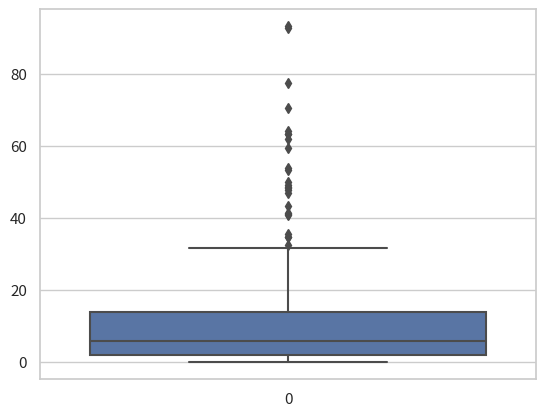

In [ ]:
# 箱型圖
sns.boxplot(data=df['平均觀看數(萬)'])
df['平均觀看數(萬)'].describe()

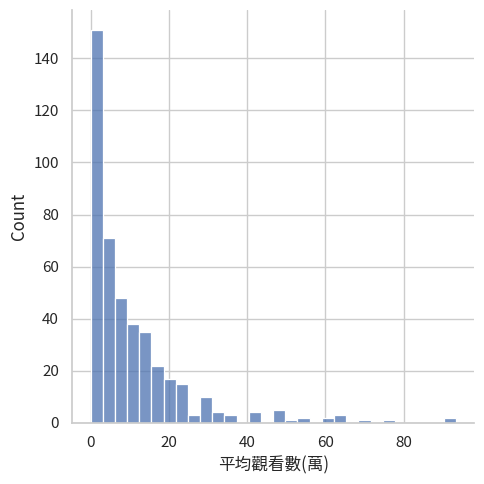

In [ ]:
# 直方圖
sns.displot(data=df, x='平均觀看數(萬)')

<Axes: xlabel='星級', ylabel='平均觀看數(萬)'>

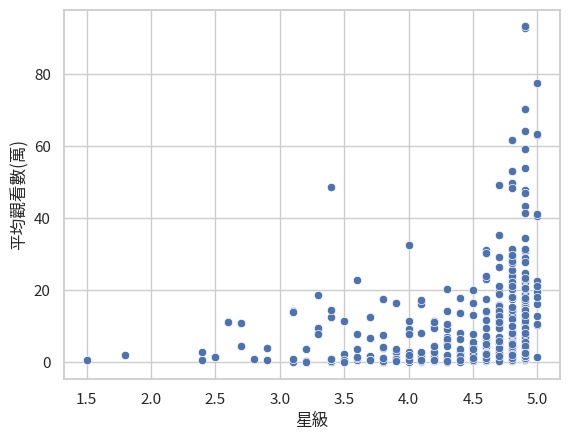

In [ ]:
# 散佈圖
sns.scatterplot(data=df, x="星級", y="平均觀看數(萬)")

# 數值資料處理

In [ ]:
# 數值資料標準化
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
df_corr = df[['集數', '星級', '評分人數', '平均觀看數(萬)', '人氣度']]
arr = std.fit_transform(df_corr)
df_corr[['集數', '星級', '評分人數', '平均觀看數(萬)', '人氣度']] = arr
df_corr

<ipython-input-716-2758365e0bc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[['集數', '星級', '評分人數', '平均觀看數(萬)', '人氣度']] = arr


,集數,星級,評分人數,平均觀看數(萬),人氣度
0,0.101010,0.942857,0.011385,0.019293,0.0
1,0.222222,0.942857,0.003795,0.003215,0.0
2,0.090909,0.942857,0.352941,0.534834,1.0
3,0.282828,0.942857,0.024668,0.020364,0.0
4,0.010101,0.942857,0.005693,0.017149,0.0
...,...,...,...,...,...
433,0.111111,0.857143,0.032258,0.085745,0.0
434,0.080808,0.914286,0.043643,0.121115,0.0
435,0.101010,0.771429,0.030361,0.120043,0.0
436,0.505051,0.742857,0.007590,0.004287,0.0


In [ ]:
# 計算相關係數
featuresCorr = df_corr[['集數', '星級', '評分人數',	'平均觀看數(萬)', '人氣度']].corr()
featuresCorr

,集數,星級,評分人數,平均觀看數(萬),人氣度
集數,1.000000,-0.024099,0.020247,-0.016369,-0.059277
星級,-0.024099,1.000000,0.276898,0.262252,0.198654
評分人數,0.020247,0.276898,1.000000,0.813731,0.615032
平均觀看數(萬),-0.016369,0.262252,0.813731,1.000000,0.748946
人氣度,-0.059277,0.198654,0.615032,0.748946,1.000000


# 比較基準

In [ ]:
# 比較基準
print(df['人氣度'].value_counts())
print()
print('人氣度0:', 328 / (110 + 328))

0    328
1    110
Name: 人氣度, dtype: int64

人氣度0: 0.7488584474885844


# 資料不降維

## CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

x = No_DR_TagList
y = df['人氣度']

cv = CountVectorizer()
data = cv.fit_transform(x)
x = data.toarray()
print(x.shape)
print()
print(x)
print()
print(cv.get_feature_names_out())

(438, 43)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


### 單純貝氏

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    score = nb.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8409090909090909
0.8068181818181818
0.7727272727272727
0.7386363636363636
0.7159090909090909
0.7954545454545454
0.6931818181818182
0.6704545454545454
0.7727272727272727
0.7386363636363636



count    10.000000
mean      0.754545
std       0.053084
min       0.670455
25%       0.721591
50%       0.755682
75%       0.789773
max       0.840909
dtype: float64

### 決策樹

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    dec = DecisionTreeClassifier(max_depth=3)
    # dec = DecisionTreeClassifier(max_depth=5)
    # dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier()
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8181818181818182
0.8068181818181818
0.7727272727272727
0.7727272727272727
0.7840909090909091
0.8295454545454546
0.8068181818181818
0.7840909090909091
0.7840909090909091
0.8409090909090909



count    10.000000
mean      0.800000
std       0.024076
min       0.772727
25%       0.784091
50%       0.795455
75%       0.815341
max       0.840909
dtype: float64

In [ ]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 3}, best_model:DecisionTreeClassifier(max_depth=3), best_score:0.7990334378265412


### 隨機森林

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)
    rf = RandomForestClassifier(n_estimators=60, min_samples_split=10)
    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8068181818181818
0.8181818181818182
0.8068181818181818
0.7954545454545454
0.7613636363636364
0.7840909090909091
0.8181818181818182
0.7727272727272727
0.7840909090909091
0.7840909090909091



count    10.000000
mean      0.793182
std       0.019165
min       0.761364
25%       0.784091
50%       0.789773
75%       0.806818
max       0.818182
dtype: float64

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60], 'min_samples_split':[10,20,30,40,50]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 10, 'n_estimators': 30}, best_model:RandomForestClassifier(min_samples_split=10, n_estimators=30), best_score:0.8059822361546498


## TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = No_DR_TagList
y = df['人氣度']

tf = TfidfVectorizer()
data = tf.fit_transform(x)
x = data.toarray()
print(x.shape)
print()
print(x)
print()
print(tf.get_feature_names_out())

(438, 43)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.77717862 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.56922247 0.         0.        ]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


### 單純貝氏

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    NB = MultinomialNB()
    NB.fit(x_train, y_train)
    score = NB.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8068181818181818
0.8181818181818182
0.7840909090909091
0.7613636363636364
0.8409090909090909
0.8181818181818182
0.7159090909090909
0.8295454545454546
0.7954545454545454
0.7954545454545454



count    10.000000
mean      0.796591
std       0.036509
min       0.715909
25%       0.786932
50%       0.801136
75%       0.818182
max       0.840909
dtype: float64

### 決策樹

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    dec = DecisionTreeClassifier(max_depth=3)
    # dec = DecisionTreeClassifier(max_depth=5)
    # dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier()
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8068181818181818
0.7954545454545454
0.75
0.7840909090909091
0.75
0.7386363636363636
0.7727272727272727
0.7613636363636364
0.7727272727272727
0.7272727272727273



count    10.000000
mean      0.765909
std       0.025240
min       0.727273
25%       0.750000
50%       0.767045
75%       0.781250
max       0.806818
dtype: float64

In [ ]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 5}, best_model:DecisionTreeClassifier(max_depth=5), best_score:0.7832027168234065


### 隨機森林(預測效果佳，導出模型)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)
    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8295454545454546
0.875
0.7727272727272727
0.7386363636363636
0.7840909090909091
0.8181818181818182
0.8295454545454546
0.8295454545454546
0.8295454545454546
0.7954545454545454



count    10.000000
mean      0.810227
std       0.038274
min       0.738636
25%       0.786932
50%       0.823864
75%       0.829545
max       0.875000
dtype: float64

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60], 'min_samples_split':[10,20,30,40,50]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 20, 'n_estimators': 10}, best_model:RandomForestClassifier(min_samples_split=20, n_estimators=10), best_score:0.810423197492163


In [ ]:
import joblib
joblib.dump(rf, '/content/drive/MyDrive/Colab Notebooks/No_DR_TfidfVectorizer_ForestRandom_10_20.pkl')

['/content/drive/MyDrive/Colab Notebooks/TfidfVectorizer_ForestRandom.pkl']

## 對應字典法

In [ ]:
dict1 = {
 '奇幻': 1,
 '冒險': 2,
 '校園': 3,
 '喜劇': 4,
 '動作': 5,
 '戀愛': 6,
 '青春': 7,
 '異世界': 8,
 '科幻': 9,
 '魔法': 10,
 '溫馨': 11,
 '勵志': 12,
 '競技': 13,
 '音樂': 14,
 '靈異神怪': 15,
 '闔家觀賞': 16,
 '運動': 17,
 '泡麵番': 18,
 '超能力': 19,
 '懸疑': 20,
 '偶像': 21,
 '職場': 22,
 '血腥暴力': 23,
 '悠閒': 24,
 '推理': 25,
 '機甲': 26,
 '戰爭': 27,
 '黑暗': 28,
 '親情': 29,
 '歷史': 30,
 '料理': 31,
 '18禁': 32,
 '時間穿越': 33,
 '感人': 34,
 'BL': 35,
 'GL': 36,
 '特攝': 37,
}

dict2 = {
  '漫畫改編': 1,
  '小說改編': 2,
  '原創作品': 3,
  '遊戲改編': 4,
}

dict3 = {
  '新作': 1,
  '續作': 2
}

dict4 = {
 'J.C.STAFF': 1,
 'A-1 Pictures': 2,
 'LIDENFILMS': 3,
 'CloverWorks': 4,
 'SUNRISE': 5,
 'TMS Entertainment': 6,
 'MAPPA': 7,
 'MADHOUSE': 8,
 'BONES': 9,
 'C2C': 10,
 'SILVER LINK.': 11,
 'Production I.G': 12,
 '動画工房': 13,
 'project No.9': 14,
 'EMT Squared': 15,
 'OLM': 16,
 '新銳動畫': 17,
 'david production': 18,
 '8bit': 19,
 'Passione': 20,
 'BN Pictures': 21,
 'STUDIO DEEN': 22,
 'diomedéa': 23,
 '亞細亞堂': 24,
 'Studio DEEN': 25,
 'Lerche': 26,
 'ENGI': 27,
 'MAHO FILM': 28,
 'ufotable': 29,
 'SHAFT': 30,
 'SATELIGHT': 31,
 'ZERO-G': 32,
 "Brain's Base": 33,
 'Lay-duce': 34,
 'P.A. WORKS': 35,
 'feel.': 36,
 'WIT STUDIO': 37,
 '旭Production': 38,
 'Studio KAI': 39,
 '動畫工房': 40,
 'Studio 五組': 41,
 'C-Station': 42,
 'ILCA': 43,
 '三次元': 44,
 'Kinema Citrus': 45,
 'ENCOURAGE FILMS': 46,
 'P.A.WORKS': 47,
}


In [ ]:
df2 = df[['製作廠商', '作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作', '人氣度']]

# 非數值資料轉換
df2['作品分類1'] = df2['作品分類1'].replace(dict1)
df2['作品分類2'] = df2['作品分類2'].replace(dict1)
df2['作品分類3'] = df2['作品分類3'].replace(dict1)
df2['作品分類4'] = df2['作品分類4'].replace(dict1)
df2['作品分類5'] = df2['作品分類5'].replace(dict1)
df2['作品分類6'] = df2['作品分類6'].replace(dict1)
df2['原作載體'] = df2['原作載體'].replace(dict2)
df2['新續作'] = df2['新續作'].replace(dict3)
df2['製作廠商'] = df2['製作廠商'].replace(dict4)

# 不在字典裡的值強制轉成NaN
df2['製作廠商'] = pd.to_numeric(df2['製作廠商'], errors='coerce', downcast='integer')
df2['作品分類1'] = pd.to_numeric(df2['作品分類1'], errors='coerce', downcast='integer')
df2['作品分類2'] = pd.to_numeric(df2['作品分類2'], errors='coerce', downcast='integer')
df2['作品分類3'] = pd.to_numeric(df2['作品分類3'], errors='coerce', downcast='integer')
df2['作品分類4'] = pd.to_numeric(df2['作品分類4'], errors='coerce', downcast='integer')
df2['作品分類5'] = pd.to_numeric(df2['作品分類5'], errors='coerce', downcast='integer')
df2['作品分類6'] = pd.to_numeric(df2['作品分類6'], errors='coerce', downcast='integer')

# NULL值以0代替
df2['作品分類1'] = df2['作品分類1'].fillna(0)
df2['作品分類2'] = df2['作品分類2'].fillna(0)
df2['作品分類3'] = df2['作品分類3'].fillna(0)
df2['作品分類4'] = df2['作品分類4'].fillna(0)
df2['作品分類5'] = df2['作品分類5'].fillna(0)
df2['作品分類6'] = df2['作品分類6'].fillna(0)
df2['原作載體'] = df2['原作載體'].fillna(0)
df2['新續作'] = df2['新續作'].fillna(0)
df2['製作廠商'] = df2['製作廠商'].fillna(0)

# 浮點數轉整數
df2['製作廠商'] = pd.to_numeric(df2['製作廠商'], errors='coerce', downcast='integer')
df2['作品分類1'] = pd.to_numeric(df2['作品分類1'], errors='coerce', downcast='integer')
df2['作品分類2'] = pd.to_numeric(df2['作品分類2'], errors='coerce', downcast='integer')
df2['作品分類3'] = pd.to_numeric(df2['作品分類3'], errors='coerce', downcast='integer')
df2['作品分類4'] = pd.to_numeric(df2['作品分類4'], errors='coerce', downcast='integer')
df2['作品分類5'] = pd.to_numeric(df2['作品分類5'], errors='coerce', downcast='integer')
df2['作品分類6'] = pd.to_numeric(df2['作品分類6'], errors='coerce', downcast='integer')
df2

<ipython-input-743-44870f51aba9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['作品分類1'] = df2['作品分類1'].replace(dict1)
<ipython-input-743-44870f51aba9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['作品分類2'] = df2['作品分類2'].replace(dict1)
<ipython-input-743-44870f51aba9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,0,4,24,18,16,0,0,1,1,0
1,0,4,11,18,16,0,0,1,1,0
2,29,5,2,1,23,0,0,1,2,1
3,0,21,14,0,0,0,0,4,2,0
4,25,1,6,30,0,0,0,4,2,0
...,...,...,...,...,...,...,...,...,...,...
433,0,5,4,12,32,0,0,1,1,0
434,0,3,4,6,32,0,0,1,1,0
435,0,1,4,32,0,0,0,1,1,0
436,0,4,24,16,18,0,0,1,1,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   製作廠商    438 non-null    int8 
 1   作品分類1   438 non-null    int8 
 2   作品分類2   438 non-null    int8 
 3   作品分類3   438 non-null    int8 
 4   作品分類4   438 non-null    int8 
 5   作品分類5   438 non-null    int8 
 6   作品分類6   438 non-null    int8 
 7   原作載體    438 non-null    int64
 8   新續作     438 non-null    int64
 9   人氣度     438 non-null    int64
dtypes: int64(3), int8(7)
memory usage: 13.4 KB


### 單純貝氏(測試訓練數值大小影響)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

x = df2[['製作廠商', '作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作']]
y = df2['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values

  nb = MultinomialNB()
  nb.fit(x_train, y_train)
  score = nb.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7272727272727273
0.7727272727272727
0.6590909090909091
0.6590909090909091
0.7727272727272727
0.7045454545454546
0.6931818181818182
0.6818181818181818
0.6704545454545454
0.6590909090909091



count    10.000000
mean      0.700000
std       0.044239
min       0.659091
25%       0.661932
50%       0.687500
75%       0.721591
max       0.772727
dtype: float64

### 決策樹(測試訓練數值大小影響)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x = df2[['製作廠商', '作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作']]
y = df2['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values

  dec = DecisionTreeClassifier(max_depth=3)
  # dec = DecisionTreeClassifier(max_depth=5)
  # dec = DecisionTreeClassifier(max_depth=10)
  # dec = DecisionTreeClassifier()
  dec.fit(x_train, y_train)
  score = dec.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8068181818181818
0.7727272727272727
0.7954545454545454
0.7727272727272727
0.7386363636363636
0.8181818181818182
0.6931818181818182
0.75
0.7272727272727273
0.7613636363636364



count    10.000000
mean      0.763636
std       0.038181
min       0.693182
25%       0.741477
50%       0.767045
75%       0.789773
max       0.818182
dtype: float64

In [ ]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 3}, best_model:DecisionTreeClassifier(max_depth=3), best_score:0.7853448275862068


### 隨機森林(測試訓練數值大小影響)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = df2[['製作廠商', '作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作']]
y = df2['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values
  # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
  rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)

  rf.fit(x_train, y_train)
  score = rf.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7840909090909091
0.8409090909090909
0.7727272727272727
0.7954545454545454
0.7954545454545454
0.7727272727272727
0.7954545454545454
0.7954545454545454
0.7386363636363636
0.7954545454545454



count    10.000000
mean      0.788636
std       0.025802
min       0.738636
25%       0.775568
50%       0.795455
75%       0.795455
max       0.840909
dtype: float64

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60], 'min_samples_split':[10,20,30,40,50]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 20, 'n_estimators': 60}, best_model:RandomForestClassifier(min_samples_split=20, n_estimators=60), best_score:0.7990595611285267


# 手動資料降維

In [ ]:
df_tag = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/pure_tag_table.csv')
df3 = df[['作品分類1','作品分類2','作品分類3','作品分類4','作品分類5','作品分類6','原作載體','新續作','人氣度']]
for tag in df_tag['index']:
  mask1 = df3['作品分類1'] == tag
  mask2 = df3['作品分類2'] == tag
  mask3 = df3['作品分類3'] == tag
  mask4 = df3['作品分類4'] == tag
  mask5 = df3['作品分類5'] == tag
  mask6 = df3['作品分類6'] == tag
  for index in df3.loc[mask1 | mask2 | mask3 | mask4 | mask5 | mask6].index:
    df3.iloc[index,0] = tag
df3

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,悠閒,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0
1,泡麵番,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0
2,血腥暴力,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,1
3,音樂,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,0
4,歷史,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,0
...,...,...,...,...,...,...,...,...,...
433,18禁,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,0
434,18禁,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,0
435,18禁,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,0
436,悠閒,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0


In [ ]:
df3 = df3[['作品分類1', '原作載體', '新續作', '人氣度']]
df4 = df3[['作品分類1', '原作載體', '新續作']]
df4

,作品分類1,原作載體,新續作
0,悠閒,漫畫改編,新作
1,泡麵番,漫畫改編,新作
2,血腥暴力,漫畫改編,續作
3,音樂,遊戲改編,續作
4,歷史,遊戲改編,續作
...,...,...,...
433,18禁,漫畫改編,新作
434,18禁,漫畫改編,新作
435,18禁,漫畫改編,新作
436,悠閒,漫畫改編,新作


In [ ]:
DR_TagList = []
for i in range(438):
    tagStr = []
    tags = df4.iloc[i].tolist()
    for tag in tags:
      tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    DR_TagList.append(tagStr)
DR_TagList

['悠閒 漫畫改編 新作',
 '泡麵番 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '音樂 遊戲改編 續作',
 '歷史 遊戲改編 續作',
 '機甲 遊戲改編 新作',
 '戰爭 原創作品 續作',
 '競技 原創作品 續作',
 '職場 原創作品 新作',
 '奇幻 小說改編 新作',
 '科幻 原創作品 新作',
 '闔家觀賞 原創作品 新作',
 '競技 原創作品 新作',
 '冒險 小說改編 續作',
 '黑暗 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '偶像 漫畫改編 新作',
 '料理 小說改編 新作',
 '青春 漫畫改編 新作',
 '奇幻 小說改編 新作',
 '奇幻 小說改編 新作',
 '歷史 遊戲改編 續作',
 '偶像 原創作品 新作',
 '冒險 小說改編 續作',
 '溫馨 漫畫改編 續作',
 '運動 漫畫改編 續作',
 '靈異神怪 漫畫改編 續作',
 '奇幻 小說改編 續作',
 '感人 漫畫改編 續作',
 '黑暗 遊戲改編 新作',
 '悠閒 漫畫改編 新作',
 '戀愛 漫畫改編 新作',
 '泡麵番 漫畫改編 新作',
 '運動 漫畫改編 新作',
 '青春 漫畫改編 新作',
 '奇幻 小說改編 新作',
 '靈異神怪 漫畫改編 新作',
 '感人 漫畫改編 續作',
 '機甲 遊戲改編 續作',
 '靈異神怪 漫畫改編 續作',
 '18禁 漫畫改編 續作',
 '奇幻 小說改編 新作',
 '溫馨 原創作品 新作',
 '奇幻 原創作品 新作',
 '血腥暴力 漫畫改編 新作',
 '血腥暴力 小說改編 新作',
 '超能力 漫畫改編 續作',
 '音樂 漫畫改編 新作',
 '悠閒 原創作品 續作',
 '戀愛 小說改編 續作',
 '職場 漫畫改編 新作',
 '科幻 漫畫改編 續作',
 '泡麵番 遊戲改編 續作',
 '運動 漫畫改編 續作',
 '悠閒 原創作品 新作',
 '懸疑 漫畫改編 續作',
 '戀愛 漫畫改編 續作',
 '戀愛 漫畫改編 新作',
 '黑暗 小說改編 續作',
 '溫馨 小說改編 新作',
 'GL 小說改編 新作',
 '親情 漫畫改編 新作',
 '青春 漫畫改編 續作',
 '戀愛 漫畫改編 新作',
 '特攝 漫畫改編 新作',
 '魔法

## CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

x = DR_TagList
y = df['人氣度']

cv = CountVectorizer()
data = cv.fit_transform(x)
x = data.toarray()
print(x.shape)
print()
print(x)
print()
print(cv.get_feature_names_out())

(438, 43)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


### 單純貝氏

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    score = nb.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7613636363636364
0.7954545454545454
0.8295454545454546
0.7727272727272727
0.7954545454545454
0.7840909090909091
0.6931818181818182
0.8522727272727273
0.7727272727272727
0.875



count    10.000000
mean      0.793182
std       0.051045
min       0.693182
25%       0.772727
50%       0.789773
75%       0.821023
max       0.875000
dtype: float64

### 決策樹(預測效果佳，導出模型)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    dec = DecisionTreeClassifier(max_depth=3)
    # dec = DecisionTreeClassifier(max_depth=5)
    # dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier(max_depth=43)
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7272727272727273
0.7272727272727273
0.8409090909090909
0.7727272727272727
0.7386363636363636
0.7954545454545454
0.7613636363636364
0.7727272727272727
0.7727272727272727
0.8068181818181818



count    10.000000
mean      0.771591
std       0.036114
min       0.727273
25%       0.744318
50%       0.772727
75%       0.789773
max       0.840909
dtype: float64

In [ ]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 3}, best_model:DecisionTreeClassifier(max_depth=3), best_score:0.7877220480668756


In [ ]:
import joblib
joblib.dump(rf, '/content/drive/MyDrive/Colab Notebooks/Simplication_CountVectorizer_DecisionTree_43.pkl')

['/content/drive/MyDrive/Colab Notebooks/Simplication_CountVectorizer_DecisionTree_43.pkl']

### 隨機森林

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)

    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7954545454545454
0.7045454545454546
0.7159090909090909
0.7840909090909091
0.7954545454545454
0.7386363636363636
0.8181818181818182
0.7272727272727273
0.8181818181818182
0.8977272727272727



count    10.000000
mean      0.779545
std       0.059217
min       0.704545
25%       0.730114
50%       0.789773
75%       0.812500
max       0.897727
dtype: float64

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60,100], 'min_samples_split':[10,20,30,40,50]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 20, 'n_estimators': 10}, best_model:RandomForestClassifier(min_samples_split=20, n_estimators=10), best_score:0.794514106583072


## TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = DR_TagList
y = df['人氣度']

tf = TfidfVectorizer()
data = tf.fit_transform(DR_TagList)
x = data.toarray()
print(x.shape)
print()
print(x)
print()
print(tf.get_feature_names_out())

(438, 43)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.90551842 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.79221343 0.         0.        ]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


### 單純貝氏

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    NB = MultinomialNB()
    NB.fit(x_train, y_train)
    score = NB.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7272727272727273
0.7840909090909091
0.7272727272727273
0.7727272727272727
0.7954545454545454
0.7159090909090909
0.7727272727272727
0.75
0.7954545454545454
0.7613636363636364



count    10.000000
mean      0.760227
std       0.029071
min       0.715909
25%       0.732955
50%       0.767045
75%       0.781250
max       0.795455
dtype: float64

### 決策樹

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # dec = DecisionTreeClassifier(max_depth=3)
    # dec = DecisionTreeClassifier(max_depth=5)
    # dec = DecisionTreeClassifier(max_depth=10)
    dec = DecisionTreeClassifier(max_depth=20)
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8295454545454546
0.7840909090909091
0.7272727272727273
0.6818181818181818
0.8295454545454546
0.7272727272727273
0.8409090909090909
0.8522727272727273
0.8181818181818182
0.7954545454545454



count    10.000000
mean      0.788636
std       0.057745
min       0.681818
25%       0.741477
50%       0.806818
75%       0.829545
max       0.852273
dtype: float64

In [ ]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 20}, best_model:DecisionTreeClassifier(max_depth=20), best_score:0.7807471264367816


### 隨機森林

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    rf = RandomForestClassifier(n_estimators=20, min_samples_split=40)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)

    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7159090909090909
0.7613636363636364
0.8636363636363636
0.6931818181818182
0.6590909090909091
0.7840909090909091
0.7272727272727273
0.7159090909090909
0.7840909090909091
0.8409090909090909



count    10.000000
mean      0.754545
std       0.064772
min       0.659091
25%       0.715909
50%       0.744318
75%       0.784091
max       0.863636
dtype: float64

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,40,50,60,100], 'min_samples_split':[10,20,30,40,50]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 40, 'n_estimators': 20}, best_model:RandomForestClassifier(min_samples_split=40, n_estimators=20), best_score:0.7898902821316615


## 對應字典法

In [ ]:
dict1 = {
 '奇幻': 1,
 '冒險': 2,
 '校園': 3,
 '喜劇': 4,
 '動作': 5,
 '戀愛': 6,
 '青春': 7,
 '異世界': 8,
 '科幻': 9,
 '魔法': 10,
 '溫馨': 11,
 '勵志': 12,
 '競技': 13,
 '音樂': 14,
 '靈異神怪': 15,
 '闔家觀賞': 16,
 '運動': 17,
 '泡麵番': 18,
 '超能力': 19,
 '懸疑': 20,
 '偶像': 21,
 '職場': 22,
 '血腥暴力': 23,
 '悠閒': 24,
 '推理': 25,
 '機甲': 26,
 '戰爭': 27,
 '黑暗': 28,
 '親情': 29,
 '歷史': 30,
 '料理': 31,
 '18禁': 32,
 '時間穿越': 33,
 '感人': 34,
 'BL': 35,
 'GL': 36,
 '特攝': 37,
}

dict2 = {
  '漫畫改編': 1,
  '小說改編': 2,
  '原創作品': 3,
  '遊戲改編': 4,
}

dict3 = {
  '新作': 1,
  '續作': 2
}

dict4 = {
 'J.C.STAFF': 1,
 'A-1 Pictures': 2,
 'LIDENFILMS': 3,
 'CloverWorks': 4,
 'SUNRISE': 5,
 'TMS Entertainment': 6,
 'MAPPA': 7,
 'MADHOUSE': 8,
 'BONES': 9,
 'C2C': 10,
 'SILVER LINK.': 11,
 'Production I.G': 12,
 '動画工房': 13,
 'project No.9': 14,
 'EMT Squared': 15,
 'OLM': 16,
 '新銳動畫': 17,
 'david production': 18,
 '8bit': 19,
 'Passione': 20,
 'BN Pictures': 21,
 'STUDIO DEEN': 22,
 'diomedéa': 23,
 '亞細亞堂': 24,
 'Studio DEEN': 25,
 'Lerche': 26,
 'ENGI': 27,
 'MAHO FILM': 28,
 'ufotable': 29,
 'SHAFT': 30,
 'SATELIGHT': 31,
 'ZERO-G': 32,
 "Brain's Base": 33,
 'Lay-duce': 34,
 'P.A. WORKS': 35,
 'feel.': 36,
 'WIT STUDIO': 37,
 '旭Production': 38,
 'Studio KAI': 39,
 '動畫工房': 40,
 'Studio 五組': 41,
 'C-Station': 42,
 'ILCA': 43,
 '三次元': 44,
 'Kinema Citrus': 45,
 'ENCOURAGE FILMS': 46,
 'P.A.WORKS': 47,
}


In [ ]:
df5 = df4[['作品分類1', '原作載體', '新續作']]
df5['作品分類1'] = df4['作品分類1'].replace(dict1)
df5['原作載體'] = df4['原作載體'].replace(dict2)
df5['新續作'] = df4['新續作'].replace(dict3)
df5

,作品分類1,原作載體,新續作
0,24,1,1
1,18,1,1
2,23,1,2
3,14,4,2
4,30,4,2
...,...,...,...
433,32,1,1
434,32,1,1
435,32,1,1
436,24,1,1


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   作品分類1   438 non-null    int64
 1   原作載體    438 non-null    int64
 2   新續作     438 non-null    int64
dtypes: int64(3)
memory usage: 10.4 KB


### 單純貝氏

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

x = df5[['作品分類1', '原作載體', '新續作']]
y = df['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values

  nb = MultinomialNB()
  nb.fit(x_train, y_train)
  score = nb.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7727272727272727
0.8295454545454546
0.8068181818181818
0.7159090909090909
0.7045454545454546
0.7272727272727273
0.6818181818181818
0.8068181818181818
0.8068181818181818
0.8068181818181818



count    10.000000
mean      0.765909
std       0.053354
min       0.681818
25%       0.718750
50%       0.789773
75%       0.806818
max       0.829545
dtype: float64

### 決策樹(不錯)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x = df5[['作品分類1', '原作載體', '新續作']]
y = df['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values

  # dec = DecisionTreeClassifier(max_depth=3)
  # dec = DecisionTreeClassifier(max_depth=5)
  dec = DecisionTreeClassifier(max_depth=10)
  # dec = DecisionTreeClassifier(max_depth=43)
  dec.fit(x_train, y_train)
  score = dec.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7840909090909091
0.8181818181818182
0.8068181818181818
0.7840909090909091
0.7613636363636364
0.7840909090909091
0.7727272727272727
0.8295454545454546
0.7613636363636364
0.8068181818181818



count    10.000000
mean      0.790909
std       0.023473
min       0.761364
25%       0.775568
50%       0.784091
75%       0.806818
max       0.829545
dtype: float64

In [ ]:
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 10}, best_model:DecisionTreeClassifier(max_depth=10), best_score:0.7852142110762801


### 隨機森林

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = df5[['作品分類1', '原作載體', '新續作']]
y = df['人氣度']

score_mean = []
for _ in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train = x_train.values
  x_test = x_test.values
  y_train = y_train.values
  y_test = y_test.values
  # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
  # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
  # rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)
  rf = RandomForestClassifier(n_estimators=43, min_samples_split=40)

  rf.fit(x_train, y_train)
  score = rf.score(x_test, y_test)
  score_mean.append(score)
  print(score)

print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7727272727272727
0.8295454545454546
0.8409090909090909
0.7840909090909091
0.7272727272727273
0.7613636363636364
0.7727272727272727
0.8068181818181818
0.8295454545454546
0.7727272727272727



count    10.000000
mean      0.789773
std       0.036035
min       0.727273
25%       0.772727
50%       0.778409
75%       0.823864
max       0.840909
dtype: float64

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,43,50], 'min_samples_split':[10,20,30,40,50,60]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 40, 'n_estimators': 43}, best_model:RandomForestClassifier(min_samples_split=40, n_estimators=43), best_score:0.7830721003134796


## DictVectorizer

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dict = DictVectorizer(sparse=False)

x = df3[['作品分類1', '原作載體', '新續作']]
y = df3['人氣度']

dict = DictVectorizer(sparse=False)
x = dict.fit_transform(x.to_dict(orient='records'))

print(x.shape)
print()
print('訓練資料：')
print(x)
print()
print('onehot 特徵名稱：')
print(dict.get_feature_names_out())

(438, 43)

訓練資料：
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

onehot 特徵名稱：
['作品分類1=18禁' '作品分類1=BL' '作品分類1=GL' '作品分類1=偶像' '作品分類1=冒險' '作品分類1=動作'
 '作品分類1=勵志' '作品分類1=喜劇' '作品分類1=奇幻' '作品分類1=悠閒' '作品分類1=感人' '作品分類1=懸疑'
 '作品分類1=戀愛' '作品分類1=戰爭' '作品分類1=推理' '作品分類1=料理' '作品分類1=時間穿越' '作品分類1=校園'
 '作品分類1=機甲' '作品分類1=歷史' '作品分類1=泡麵番' '作品分類1=溫馨' '作品分類1=特攝' '作品分類1=異世界'
 '作品分類1=科幻' '作品分類1=競技' '作品分類1=職場' '作品分類1=血腥暴力' '作品分類1=親情' '作品分類1=超能力'
 '作品分類1=運動' '作品分類1=闔家觀賞' '作品分類1=靈異神怪' '作品分類1=青春' '作品分類1=音樂' '作品分類1=魔法'
 '作品分類1=黑暗' '原作載體=原創作品' '原作載體=小說改編' '原作載體=漫畫改編' '原作載體=遊戲改編' '新續作=新作'
 '新續作=續作']


### 單純貝氏(不錯)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    score = nb.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.75
0.7613636363636364
0.7840909090909091
0.7954545454545454
0.8181818181818182
0.75
0.7727272727272727
0.7159090909090909
0.7954545454545454
0.75



count    10.000000
mean      0.769318
std       0.029850
min       0.715909
25%       0.750000
50%       0.767045
75%       0.792614
max       0.818182
dtype: float64

### 決策樹(預測效果佳，導出模型)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # dec = DecisionTreeClassifier(max_depth=3)
    # dec = DecisionTreeClassifier(max_depth=5)
    dec = DecisionTreeClassifier(max_depth=10)
    # dec = DecisionTreeClassifier(max_depth=43)
    dec.fit(x_train, y_train)
    score = dec.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.7386363636363636
0.7159090909090909
0.75
0.8068181818181818
0.7954545454545454
0.7613636363636364
0.7613636363636364
0.8409090909090909
0.8636363636363636
0.7727272727272727



count    10.000000
mean      0.780682
std       0.046097
min       0.715909
25%       0.752841
50%       0.767045
75%       0.803977
max       0.863636
dtype: float64

In [ ]:
# 網格搜索
# 參數max_depth最佳化
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,10,20,25,30,40,43]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(dec, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'max_depth': 3}, best_model:DecisionTreeClassifier(max_depth=3), best_score:0.7877220480668756


In [ ]:
# 導出預測模型
import joblib
joblib.dump(dec, '/content/drive/MyDrive/Colab/DR_DictVevtorizer_DecisionTree_10.pkl')

['/content/drive/MyDrive/Colab Notebooks/DR_DictVevtorizer_DecisionTree_10.pkl']

### 隨機森林

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
score_mean = []
for _ in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # rf = RandomForestClassifier(n_estimators=10, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=20, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=30, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=40, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=50, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=30)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=50)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=100)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
    # rf = RandomForestClassifier(n_estimators=100, min_samples_split=20)
    rf = RandomForestClassifier(n_estimators=50, min_samples_split=10)

    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    score_mean.append(score)
    print(score)
print()
score_mean = pd.Series(score_mean)
score_mean.describe()

0.8409090909090909
0.8295454545454546
0.7272727272727273
0.8181818181818182
0.8181818181818182
0.7045454545454546
0.75
0.7954545454545454
0.7613636363636364
0.8068181818181818



count    10.000000
mean      0.785227
std       0.046531
min       0.704545
25%       0.752841
50%       0.801136
75%       0.818182
max       0.840909
dtype: float64

In [ ]:
# 參數n_estimators、min_samples_split最佳化
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10,20,30,43,50], 'min_samples_split':[10,20,30,40,50,60]}

# Create a GridSearchCV object with the desired parameters and model.
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x, y)

# Get the best parameters found by the search.
best_params = grid_search.best_params_

# Get the best model found by the search.
best_model = grid_search.best_estimator_

# Get the best score found by the search.
best_score = grid_search.best_score_

# Get the results of the cross-validation search.
cv_results = grid_search.cv_results_

print(f'best_params:{best_params}, best_model:{best_model}, best_score:{best_score}')

best_params:{'min_samples_split': 10, 'n_estimators': 50}, best_model:RandomForestClassifier(min_samples_split=10, n_estimators=50), best_score:0.7944879832810867


# 影響觀看數關鍵因子

In [ ]:
# 各標籤占比
df_ratio_table = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/ratio_table.csv')
df_ratio_table

,index,全部,前25%,比例(%)
0,異世界,53,32,60.38
1,時間穿越,5,3,60.00
2,魔法,48,28,58.33
3,小說改編,103,56,54.37
4,血腥暴力,21,11,52.38
5,GL,2,1,50.00
6,奇幻,145,61,42.07
7,超能力,27,11,40.74
8,動作,95,38,40.00
9,冒險,129,50,38.76


In [ ]:
# 降維後的資料表加入「平均觀看數(萬)」
df6 = df3[['作品分類1', '原作載體', '新續作']]
df6['平均觀看數(萬)'] = df['平均觀看數(萬)']
df6

,作品分類1,原作載體,新續作,平均觀看數(萬)
0,悠閒,漫畫改編,新作,1.8
1,泡麵番,漫畫改編,新作,0.3
2,血腥暴力,漫畫改編,續作,49.9
3,音樂,遊戲改編,續作,1.9
4,歷史,遊戲改編,續作,1.6
...,...,...,...,...
433,18禁,漫畫改編,新作,8.0
434,18禁,漫畫改編,新作,11.3
435,18禁,漫畫改編,新作,11.2
436,悠閒,漫畫改編,新作,0.4


## 作品分類

In [ ]:
# 每種標籤觀看數統計
d = {}
for item in df_tag['index']:
  mask = df6['作品分類1'] == item
  s = df6[mask]['平均觀看數(萬)']
  d.update({item:{'最低':s.min(), '平均':round(s.mean(), ndigits=1), '中位數':round(s.median(), ndigits=1), '最高':s.max()}})
df_tag_view = pd.DataFrame(d)
df_tag_view = df_tag_view.T.sort_values('最高', ascending=False)
df_tag_view

,最低,平均,中位數,最高
血腥暴力,1.8,31.0,19.0,93.3
戀愛,1.7,14.9,12.7,77.6
親情,0.1,14.1,7.7,70.4
偶像,0.6,6.7,2.4,64.2
青春,0.7,14.4,8.0,63.3
音樂,0.4,8.9,2.1,63.2
魔法,1.2,21.1,16.5,61.8
戰爭,1.6,15.6,6.8,59.3
喜劇,0.1,15.2,11.0,53.3
異世界,3.6,15.8,12.5,48.4


In [ ]:
# t1 = []
# for item in df_tag_view.index:
#   num = df6['作品分類1'].value_counts()[item]
#   t1.append(num)
# df_tag_view['個數'] = t1

df_tag_view[df_tag_view.中位數 > 10]

,最低,平均,中位數,最高
血腥暴力,1.8,31.0,19.0,93.3
戀愛,1.7,14.9,12.7,77.6
魔法,1.2,21.1,16.5,61.8
喜劇,0.1,15.2,11.0,53.3
異世界,3.6,15.8,12.5,48.4
時間穿越,2.4,15.7,15.5,32.5
料理,2.1,12.7,13.0,28.9
勵志,3.0,13.8,11.1,26.4
超能力,0.3,12.1,14.6,23.9
感人,2.5,9.9,12.9,16.2


In [ ]:
df6[df6['作品分類1']=='料理'].index
df.iloc[[17, 91, 139, 189, 210, 388, 427]]

## 原作載體

In [ ]:
d = {}
for item in df6['原作載體'].unique():
  mask = df6['原作載體'] == item
  s = df6[mask]['平均觀看數(萬)']
  d.update({item:{'最低':s.min(), '平均':round(s.mean(), ndigits=1), '中位數':round(s.median(), ndigits=1), '最高':s.max()}})
df_original = pd.DataFrame(d)
df_original = df_original.T.sort_values('最高', ascending=False)
t1 = []
t2 = []
# for item in df_original.index:
#   s1 = df_ratio_table[df_ratio_table['index'] == item]['全部']
#   s2 = df_ratio_table[df_ratio_table['index'] == item]['前25%']
#   t1.append(s1.iloc[0])
#   t2.append(s2.iloc[0])
# df_original['全部'] = t1
# df_original['前25%'] = t2
df_original

,最低,平均,中位數,最高
漫畫改編,0.0,11.2,6.8,93.3
小說改編,0.3,17.6,14.4,61.8
原創作品,0.1,5.0,1.8,59.3
遊戲改編,0.2,2.7,1.9,15.8


## 新續作

In [ ]:
d = {}
for item in df6['新續作'].unique():
  mask = df6['新續作'] == item
  s = df6[mask]['平均觀看數(萬)']
  d.update({item:{'最低':s.min(), '平均':round(s.mean(), ndigits=1), '中位數':round(s.median(), ndigits=1), '最高':s.max()}})
df_new_old = pd.DataFrame(d)
df_new_old = df_new_old.T.sort_values('最高', ascending=False)
t1 = []
t2 = []
# for item in df_new_old.index:
#   s1 = df_ratio_table[df_ratio_table['index'] == item]['全部']
#   s2 = df_ratio_table[df_ratio_table['index'] == item]['前25%']
#   t1.append(s1.iloc[0])
#   t2.append(s2.iloc[0])
# df_new_old['全部'] = t1
# df_new_old['前25%'] = t2
df_new_old

,最低,平均,中位數,最高
新作,0.0,9.7,5.6,93.3
續作,0.1,12.3,6.8,92.8


## 動畫製作公司

In [ ]:
df7 = df[['製作廠商', '平均觀看數(萬)']]
d = {}
for key, value in df7.groupby('製作廠商').groups.items():
  s1 = df['平均觀看數(萬)'][value]
  d.update({key:{'最低':s1.min(), '平均':round(s1.mean(), ndigits=1), '中位數':s1.median(), '最高':s1.max(), '作品數':len(value)}})
df7 = pd.DataFrame(d)
df7 = df7.T
df7['作品數'] = pd.to_numeric(df7['作品數'], downcast='integer')
df7 = df7.sort_values('作品數', ascending=False)
# df7 = df7[(df7['最高'] > 14.0) & (df7['作品數'] >= 3)]
# df7.sort_values('最高', ascending=False)
df7

,最低,平均,中位數,最高,作品數
J.C.STAFF,0.6,11.0,9.70,31.6,15
A-1 Pictures,2.3,26.4,19.70,77.6,13
LIDENFILMS,0.7,6.2,2.50,20.3,13
CloverWorks,1.1,20.0,11.25,63.3,12
TMS Entertainment,0.7,8.6,7.70,23.2,10
...,...,...,...,...,...
SIGNAL.MD,1.6,1.6,1.60,1.6,1
SCIENCE SARU INC.,8.1,8.1,8.10,8.1,1
Project No.9,4.4,4.4,4.40,4.4,1
Passione×Studio Lings,2.5,2.5,2.50,2.5,1


## 儲存CSV

In [ ]:
df7.to_csv('/content/drive/MyDrive/Colab Notebooks/Anime_Company.csv', index_label='動畫公司')

In [ ]:
df_new_old.to_csv('/content/drive/MyDrive/Colab Notebooks/New_or_Sequel.csv', index_label='新續作')

In [ ]:
df_original.to_csv('/content/drive/MyDrive/Colab Notebooks/Original_or_Adapted.csv', index_label='原作載體')

In [ ]:
df_tag_view.to_csv('/content/drive/MyDrive/Colab Notebooks/Tags_View_Number.csv', index_label='標籤')

# 驗證模型準確率

In [111]:
# 載入CSV
df_test = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/test_dataset.csv')

# 挑選需要的columns
df_test = df_test[['動畫名', '觀看數', '集數', '作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作']]

# 改變觀看數、集數資料型態
df_test['觀看數'] = df_test['觀看數'].map(lambda num:num[:-1])
df_test['觀看數'] = pd.to_numeric(df_test['觀看數'])
df_test['集數'] = pd.to_numeric(df_test['集數'])

# 新增平均觀看數
df_test['平均觀看數(萬)'] = round(df_test['觀看數'] / df_test['集數'], ndigits=2)

# 檢查缺失值
condition = df_test[['原作載體','新續作']].isnull().any(axis='columns')
df_test[condition]

# 填補缺失值
df_test.iloc[29,9] = '漫畫改編'
df_test.iloc[29,10] = '續作'
df_test.iloc[30,9] = '漫畫改編'
df_test.iloc[30,10] = '新作'
df_test.iloc[31,9] = '遊戲改編'
df_test.iloc[31,10] = '續作'
df_test.iloc[32,9] = '漫畫改編'
df_test.iloc[32,10] = '新作'
df_test.iloc[33,9] = '漫畫改編'
df_test.iloc[33,10] = '續作'

condition = df_test[['原作載體','新續作']].isnull().any(axis='columns')
df_test[condition]


,動畫名,觀看數,集數,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬)


In [112]:
p = df_test['平均觀看數(萬)'].to_list()
q = []

for number in p:
  if number >= 14:
    q.append(1)
  else:
    q.append(0)

df_test['人氣度'] = q
df_test1 = df_test[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6', '原作載體', '新續作', '人氣度']]
df_test1

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,超能力,喜劇,職場,NaN,NaN,NaN,漫畫改編,新作,0
1,動作,冒險,奇幻,超能力,血腥暴力,NaN,漫畫改編,新作,0
2,異世界,魔法,校園,喜劇,戀愛,GL,小說改編,新作,0
3,青春,競技,NaN,NaN,NaN,NaN,原創作品,新作,0
4,校園,戀愛,NaN,NaN,NaN,NaN,小說改編,新作,0
...,...,...,...,...,...,...,...,...,...
71,校園,喜劇,青春,音樂,NaN,NaN,原創作品,新作,0
72,偶像,音樂,NaN,NaN,NaN,NaN,原創作品,續作,0
73,喜劇,推理,懸疑,NaN,NaN,NaN,漫畫改編,新作,0
74,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,續作,1


In [113]:
df_test1['人氣度'].value_counts()

0    69
1     7
Name: 人氣度, dtype: int64

## 資料不降維


### TfidfVectorizer_Random_Forest_10_20

In [114]:
No_DR_TestList = ['18禁 bl 特攝']
for i in range(76):
    tagStr = []
    tags = df_test1.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    No_DR_TestList.append(tagStr)
No_DR_TestList

['18禁 bl 特攝',
 '超能力 喜劇 職場 漫畫改編 新作',
 '動作 冒險 奇幻 超能力 血腥暴力 漫畫改編 新作',
 '異世界 魔法 校園 喜劇 戀愛 GL 小說改編 新作',
 '青春 競技 原創作品 新作',
 '校園 戀愛 小說改編 新作',
 '冒險 奇幻 魔法 小說改編 續作',
 '冒險 奇幻 異世界 魔法 校園 時間穿越 小說改編 新作',
 '溫馨 親情 感人 闔家觀賞 漫畫改編 新作',
 '喜劇 溫馨 職場 漫畫改編 新作',
 '異世界 魔法 戀愛 小說改編 續作',
 '校園 喜劇 戀愛 漫畫改編 續作',
 '冒險 奇幻 魔法 血腥暴力 黑暗 漫畫改編 新作',
 '動作 喜劇 漫畫改編 新作',
 '競技 音樂 原創作品 新作',
 '動作 喜劇 溫馨 親情 漫畫改編 續作',
 '競技 音樂 原創作品 續作',
 '喜劇 闔家觀賞 泡麵番 遊戲改編 新作',
 '校園 喜劇 戀愛 漫畫改編 新作',
 '動作 冒險 奇幻 異世界 魔法 血腥暴力 小說改編 續作',
 '溫馨 闔家觀賞 泡麵番 漫畫改編 新作',
 '冒險 奇幻 異世界 魔法 小說改編 續作',
 '冒險 奇幻 血腥暴力 黑暗 小說改編 續作',
 '校園 偶像 音樂 原創作品 續作',
 '科幻 機甲 職場 小說改編 新作',
 '校園 青春 溫馨 漫畫改編 新作',
 '奇幻 魔法 戀愛 小說改編 新作',
 '溫馨 職場 漫畫改編 新作',
 '職場 時間穿越 漫畫改編 新作',
 '冒險 奇幻 魔法 喜劇 戰爭 小說改編 新作',
 '動作 超能力 漫畫改編 續作',
 '動作 喜劇 血腥暴力 漫畫改編 新作',
 '運動 競技 遊戲改編 續作',
 '科幻 職場 漫畫改編 新作',
 '動作 冒險 奇幻 血腥暴力 漫畫改編 續作',
 '冒險 奇幻 異世界 小說改編 新作',
 '校園 青春 競技 小說改編 新作',
 '職場 泡麵番 闔家觀賞 漫畫改編 新作',
 '喜劇 戀愛 漫畫改編 新作',
 '動作 冒險 歷史 漫畫改編 續作',
 '冒險 奇幻 小說改編 新作',
 '喜劇 溫馨 悠閒 漫畫改編 新作',
 '異世界 料理 小說改編 新作',
 '推理 懸疑 漫畫改編 新作',
 '冒險 奇幻 漫畫改編 新作',
 '奇幻 魔法 喜劇

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = No_DR_TestList
y = df_test['人氣度']

tf = TfidfVectorizer()
data = tf.fit_transform(x)
x = data.toarray()
print(x.shape)
print()
print(x)
print()
print(tf.get_feature_names_out())

(77, 43)

[[0.57735027 0.57735027 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


In [ ]:
# 訓練資料的標籤
 ['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']

In [116]:
x = list(x)
del x[0]
x = np.array(x)
x.shape

(76, 43)

In [117]:
from sklearn.model_selection import train_test_split
import joblib

No_DR_TfidfVectorizer_ForestRandom_10_20 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/No_DR_TfidfVectorizer_ForestRandom_10_20.pkl')
score_test = []
for _ in range(5):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
  score = No_DR_TfidfVectorizer_ForestRandom_10_20.score(x_train, y_train)
  score_test.append(score)
  print(score)
  score = No_DR_TfidfVectorizer_ForestRandom_10_20.score(x_test, y_test)
  score_test.append(score)
  print(score)
print()
score_test = pd.Series(score_test)
score_test.describe()

0.7105263157894737
0.7368421052631579
0.6842105263157895
0.7631578947368421
0.7894736842105263
0.6578947368421053
0.7631578947368421
0.6842105263157895
0.8157894736842105
0.631578947368421



count    10.000000
mean      0.723684
std       0.059817
min       0.631579
25%       0.684211
50%       0.723684
75%       0.763158
max       0.815789
dtype: float64

In [118]:
df_test[df_test1['人氣度']==1]

,動畫名,觀看數,集數,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬),人氣度
14,SPY x FAMILY 間諜家家酒 Season 2,171.4,8,動作,喜劇,溫馨,親情,NaN,NaN,漫畫改編,續作,21.42,1
18,我想成為影之強者！第二季,213.1,9,動作,冒險,奇幻,異世界,魔法,血腥暴力,小說改編,續作,23.68,1
30,殭屍 100～在成為殭屍前要做的 100 件事～,175.3,9,動作,喜劇,血腥暴力,NaN,NaN,NaN,漫畫改編,新作,19.48,1
40,能幹貓今天也憂鬱,200.8,13,喜劇,溫馨,悠閒,NaN,NaN,NaN,漫畫改編,新作,15.45,1
50,香格里拉・開拓異境～糞作獵手挑戰神作～,179.0,9,動作,冒險,奇幻,NaN,NaN,NaN,小說改編,新作,19.89,1
57,無職轉生～到了異世界就拿出真本事 第二季,337.2,13,動作,冒險,奇幻,異世界,魔法,NaN,小說改編,續作,25.94,1
74,咒術迴戰 第二季,738.2,19,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,續作,38.85,1


In [119]:
x1 = []
y1 = []
for index in df_test[df_test1['人氣度']==1].index:
  x1.append(x[index])
  y1.append(y[index])

y_predeict = No_DR_TfidfVectorizer_ForestRandom_10_20.predict(x1)

print(y1)
print(y_predeict)
score = No_DR_TfidfVectorizer_ForestRandom_10_20.score(x1, y1)
print(score)

[1, 1, 1, 1, 1, 1, 1]
[0 1 0 0 0 1 0]
0.2857142857142857


## 手動資料降維

In [153]:
df_test2 = df_test1
df_test2

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,職場,喜劇,職場,NaN,NaN,NaN,漫畫改編,新作,0
1,血腥暴力,冒險,奇幻,超能力,血腥暴力,NaN,漫畫改編,新作,0
2,GL,魔法,校園,喜劇,戀愛,GL,小說改編,新作,0
3,競技,競技,NaN,NaN,NaN,NaN,原創作品,新作,0
4,戀愛,戀愛,NaN,NaN,NaN,NaN,小說改編,新作,0
...,...,...,...,...,...,...,...,...,...
71,音樂,喜劇,青春,音樂,NaN,NaN,原創作品,新作,0
72,音樂,音樂,NaN,NaN,NaN,NaN,原創作品,續作,0
73,推理,推理,懸疑,NaN,NaN,NaN,漫畫改編,新作,0
74,血腥暴力,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,續作,1


In [154]:
df_tag = pd.read_csv('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/csv/pure_tag_table.csv')
for tag in df_tag['index']:
  mask1 = df_test2['作品分類1'] == tag
  mask2 = df_test2['作品分類2'] == tag
  mask3 = df_test2['作品分類3'] == tag
  mask4 = df_test2['作品分類4'] == tag
  mask5 = df_test2['作品分類5'] == tag
  mask6 = df_test2['作品分類6'] == tag
  for index in df_test2.loc[mask1 | mask2 | mask3 | mask4 | mask5 | mask6].index:
    df_test2.iloc[index,0] = tag
df_test2

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度
0,職場,喜劇,職場,NaN,NaN,NaN,漫畫改編,新作,0
1,血腥暴力,冒險,奇幻,超能力,血腥暴力,NaN,漫畫改編,新作,0
2,GL,魔法,校園,喜劇,戀愛,GL,小說改編,新作,0
3,競技,競技,NaN,NaN,NaN,NaN,原創作品,新作,0
4,戀愛,戀愛,NaN,NaN,NaN,NaN,小說改編,新作,0
...,...,...,...,...,...,...,...,...,...
71,音樂,喜劇,青春,音樂,NaN,NaN,原創作品,新作,0
72,音樂,音樂,NaN,NaN,NaN,NaN,原創作品,續作,0
73,推理,推理,懸疑,NaN,NaN,NaN,漫畫改編,新作,0
74,血腥暴力,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,續作,1


In [155]:
df_test3 = df_test2[['作品分類1', '原作載體', '新續作']]
df_test3

,作品分類1,原作載體,新續作
0,職場,漫畫改編,新作
1,血腥暴力,漫畫改編,新作
2,GL,小說改編,新作
3,競技,原創作品,新作
4,戀愛,小說改編,新作
...,...,...,...
71,音樂,原創作品,新作
72,音樂,原創作品,續作
73,推理,漫畫改編,新作
74,血腥暴力,漫畫改編,續作


In [156]:
df_test3['作品分類1'].value_counts()

魔法      8
血腥暴力    5
戀愛      5
異世界     5
職場      4
青春      4
奇幻      4
黑暗      4
音樂      4
競技      3
時間穿越    3
喜劇      3
泡麵番     3
超能力     2
親情      2
偶像      2
感人      2
懸疑      2
運動      1
闔家觀賞    1
料理      1
冒險      1
機甲      1
悠閒      1
歷史      1
戰爭      1
溫馨      1
GL      1
推理      1
Name: 作品分類1, dtype: int64

In [157]:
DR_TestList = ['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪']
for i in range(76):
    tagStr = []
    tags = df_test3.iloc[i].tolist()
    for tag in tags:
      tagStr.append(tag)
    tagStr = ' '.join(tagStr)
    DR_TestList.append(tagStr)
DR_TestList

['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪',
 '職場 漫畫改編 新作',
 '血腥暴力 漫畫改編 新作',
 'GL 小說改編 新作',
 '競技 原創作品 新作',
 '戀愛 小說改編 新作',
 '魔法 小說改編 續作',
 '時間穿越 小說改編 新作',
 '感人 漫畫改編 新作',
 '職場 漫畫改編 新作',
 '魔法 小說改編 續作',
 '戀愛 漫畫改編 續作',
 '黑暗 漫畫改編 新作',
 '喜劇 漫畫改編 新作',
 '音樂 原創作品 新作',
 '親情 漫畫改編 續作',
 '音樂 原創作品 續作',
 '泡麵番 遊戲改編 新作',
 '戀愛 漫畫改編 新作',
 '血腥暴力 小說改編 續作',
 '泡麵番 漫畫改編 新作',
 '魔法 小說改編 續作',
 '黑暗 小說改編 續作',
 '偶像 原創作品 續作',
 '機甲 小說改編 新作',
 '溫馨 漫畫改編 新作',
 '魔法 小說改編 新作',
 '職場 漫畫改編 新作',
 '時間穿越 漫畫改編 新作',
 '戰爭 小說改編 新作',
 '超能力 漫畫改編 續作',
 '血腥暴力 漫畫改編 新作',
 '競技 遊戲改編 續作',
 '職場 漫畫改編 新作',
 '血腥暴力 漫畫改編 續作',
 '異世界 小說改編 新作',
 '競技 小說改編 新作',
 '泡麵番 漫畫改編 新作',
 '戀愛 漫畫改編 新作',
 '歷史 漫畫改編 續作',
 '奇幻 小說改編 新作',
 '悠閒 漫畫改編 新作',
 '料理 小說改編 新作',
 '懸疑 漫畫改編 新作',
 '奇幻 漫畫改編 新作',
 '親情 漫畫改編 新作',
 '魔法 小說改編 新作',
 '奇幻 小說改編 新作',
 '戀愛 漫畫改編 新作',
 '感人 漫畫改編 新作',
 '黑暗 小說改編 新作',
 '冒險 小說改編 新作',
 '闔家觀賞 漫畫改編 續作',
 '運動 原創作品 新作',
 '黑暗 漫畫改編 新作',
 '懸疑 小說改編 新作',
 '異世界 小說改編 新作',
 '青春 漫畫改編 續作',
 '魔法 小說改編 續作',
 '青春 漫畫改編 續作',
 '青春 小說改編 新作',
 '喜劇 漫畫改編 新作',
 '奇幻 遊戲改編 新作',
 '超能力 原創作品 新作',
 '魔

### DR_CountVectorizer_DecisionTree_43

In [158]:
from sklearn.feature_extraction.text import CountVectorizer

x = DR_TestList
y = df_test['人氣度']

cv = CountVectorizer()
data = cv.fit_transform(x)
x = data.toarray()
print(x.shape)
print()
print(x)
print()
print(cv.get_feature_names_out())

(77, 43)

[[1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']


In [ ]:
# 訓練資料的標籤
 ['18禁' 'bl' 'gl' '偶像' '冒險' '動作' '勵志' '原創作品' '喜劇' '奇幻' '小說改編' '悠閒' '感人'
 '懸疑' '戀愛' '戰爭' '推理' '料理' '新作' '時間穿越' '校園' '機甲' '歷史' '泡麵番' '溫馨' '漫畫改編'
 '特攝' '異世界' '科幻' '競技' '續作' '職場' '血腥暴力' '親情' '超能力' '遊戲改編' '運動' '闔家觀賞'
 '靈異神怪' '青春' '音樂' '魔法' '黑暗']

In [159]:
x = list(x)
del x[0]
x = np.array(x)
x.shape

(76, 43)

In [160]:
from sklearn.model_selection import train_test_split
import joblib

DR_CountVectorizer_DecisionTree_43 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_CountVectorizer_DecisionTree_43.pkl')
score_test = []
for _ in range(5):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
  score = DR_CountVectorizer_DecisionTree_43.score(x_train, y_train)
  score_test.append(score)
  print(score)
  score = DR_CountVectorizer_DecisionTree_43.score(x_test, y_test)
  score_test.append(score)
  print(score)
print()
score_test = pd.Series(score_test)
score_test.describe()

0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7368421052631579
0.8421052631578947
0.7631578947368421
0.8157894736842105



count    10.000000
mean      0.789474
std       0.027739
min       0.736842
25%       0.789474
50%       0.789474
75%       0.789474
max       0.842105
dtype: float64

In [161]:
x1 = []
y1 = []
for index in df_test[df_test1['人氣度']==1].index:
  x1.append(x[index])
  y1.append(y[index])

y_predeict = DR_CountVectorizer_DecisionTree_43.predict(x1)

print(y1)
print(y_predeict)
score = DR_CountVectorizer_DecisionTree_43.score(x1, y1)
print(score)

[1, 1, 1, 1, 1, 1, 1]
[0 1 0 0 0 1 1]
0.42857142857142855


### DR_DictVectorizer_DecisionTree_10

In [162]:
# 補足df_test4缺少的標籤(必須與訓練資料一樣)
# ['18禁 bl 特攝 動作 勵志 校園 科幻 靈異神怪']
df_test4 = df_test3.append(pd.DataFrame([['18禁','原創作品','新作'],
               ['bl','原創作品','新作'],
               ['特攝','原創作品','新作'],
               ['動作','原創作品','新作'],
               ['勵志','原創作品','新作'],
               ['校園','原創作品','新作'],
               ['科幻','原創作品','新作'],
               ['靈異神怪','原創作品','新作']], columns=['作品分類1', '原作載體', '新續作']))
df_test4.tail(10)

<ipython-input-162-e7eed5d7aeee>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test4 = df_test3.append(pd.DataFrame([['18禁','原創作品','新作'],


,作品分類1,原作載體,新續作
74,血腥暴力,漫畫改編,續作
75,異世界,小說改編,新作
0,18禁,原創作品,新作
1,bl,原創作品,新作
2,特攝,原創作品,新作
3,動作,原創作品,新作
4,勵志,原創作品,新作
5,校園,原創作品,新作
6,科幻,原創作品,新作
7,靈異神怪,原創作品,新作


In [163]:
from sklearn.feature_extraction import DictVectorizer
dict = DictVectorizer(sparse=False)

x = df_test4[['作品分類1', '原作載體', '新續作']]
y = df_test['人氣度']

dict = DictVectorizer(sparse=False)
x = dict.fit_transform(x.to_dict(orient='records'))

print(x.shape)
print()
print('訓練資料：')
print(x)
print()
print('onehot 特徵名稱：')
print(dict.get_feature_names_out())

(84, 43)

訓練資料：
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]

onehot 特徵名稱：
['作品分類1=18禁' '作品分類1=GL' '作品分類1=bl' '作品分類1=偶像' '作品分類1=冒險' '作品分類1=動作'
 '作品分類1=勵志' '作品分類1=喜劇' '作品分類1=奇幻' '作品分類1=悠閒' '作品分類1=感人' '作品分類1=懸疑'
 '作品分類1=戀愛' '作品分類1=戰爭' '作品分類1=推理' '作品分類1=料理' '作品分類1=時間穿越' '作品分類1=校園'
 '作品分類1=機甲' '作品分類1=歷史' '作品分類1=泡麵番' '作品分類1=溫馨' '作品分類1=特攝' '作品分類1=異世界'
 '作品分類1=科幻' '作品分類1=競技' '作品分類1=職場' '作品分類1=血腥暴力' '作品分類1=親情' '作品分類1=超能力'
 '作品分類1=運動' '作品分類1=闔家觀賞' '作品分類1=靈異神怪' '作品分類1=青春' '作品分類1=音樂' '作品分類1=魔法'
 '作品分類1=黑暗' '原作載體=原創作品' '原作載體=小說改編' '原作載體=漫畫改編' '原作載體=遊戲改編' '新續作=新作'
 '新續作=續作']


In [164]:
x = list(x)
del x[-8:]
x = np.array(x)
x.shape

(76, 43)

In [165]:
from sklearn.model_selection import train_test_split
import joblib

DR_DictVectorizer_DecisionTree_10 = joblib.load('/content/drive/MyDrive/Colab/Anime_View_Number_Analysis/pkl/DR_DictVectorizer_DecisionTree_10.pkl')
score_test = []
for _ in range(5):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
  score = DR_DictVectorizer_DecisionTree_10.score(x_train, y_train)
  score_test.append(score)
  print(score)
  score = DR_DictVectorizer_DecisionTree_10.score(x_test, y_test)
  score_test.append(score)
  print(score)
print()
score_test = pd.Series(score_test)
score_test.describe()

0.7894736842105263
0.6842105263157895
0.7105263157894737
0.7631578947368421
0.7894736842105263
0.6842105263157895
0.7105263157894737
0.7631578947368421
0.7631578947368421
0.7105263157894737



count    10.000000
mean      0.736842
std       0.041144
min       0.684211
25%       0.710526
50%       0.736842
75%       0.763158
max       0.789474
dtype: float64

In [166]:
x1 = []
y1 = []
for index in df_test[df_test1['人氣度']==1].index:
  x1.append(x[index])
  y1.append(y[index])

y_predeict = DR_DictVectorizer_DecisionTree_10.predict(x1)

print(y1)
print(y_predeict)
score = DR_DictVectorizer_DecisionTree_10.score(x1, y1)
print(score)

[1, 1, 1, 1, 1, 1, 1]
[1 1 0 0 0 1 1]
0.5714285714285714


## 決策樹視覺化

In [168]:
# 決策樹視覺化
from sklearn.tree import export_graphviz
export_graphviz(DR_DictVectorizer_DecisionTree_10,
        out_file='DR_DictVectorizer_DecisionTree_10.dot',
        feature_names=['18', 'bl', 'gl', 'idol', 'adventure', 'action',
                'encouraging', 'comedy', 'fantastic',
                'slice_of_life', 'touching', 'suspense',
                'love', 'war', 'reasoning', 'cuisine', 'time_leap',
                'school', 'robot', 'history', 'instant_noodles', 'heartwarming',
                'hero', 'Different_world', 'sci-fi', 'competiton',
                'job', 'violence', 'family-love', 'superpower', 'sports', 'family-watching',
                'gods', 'youth', 'music', 'magic', 'dark', 'original', 'novel-based', 'comic-based',
                'game-based', 'new_work', 'sequel'],
                class_names=['0','1'],
        rounded=True,
        filled=True)

In [169]:
!dot -Tpng DR_DictVectorizer_DecisionTree_10.dot -o DR_DictVectorizer_DecisionTree_10.png

# 結論
